In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df = pd.read_csv("data/ECommerceDataset.csv", index_col="CustomerID")
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [3]:
df.tail()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [4]:
# Number of rows and columns using shape
df.shape

(5630, 19)

In [5]:
# Gaining information from dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain     

# Data Cleaning

### Checking for CustomerID

In [6]:
dfID = pd.read_csv("data/ECommerceDataset.csv")
dfID["CustomerID"].head()

0    50001
1    50002
2    50003
3    50004
4    50005
Name: CustomerID, dtype: int64

In [7]:
dfID["CustomerID"].nunique()

5630

In [8]:
dfID["CustomerIDlength"] = dfID["CustomerID"].map(str).apply(len)
dfID["CustomerIDlength"].head()

0    5
1    5
2    5
3    5
4    5
Name: CustomerIDlength, dtype: int64

In [9]:
(dfID["CustomerIDlength"] == 5).value_counts()

True    5630
Name: CustomerIDlength, dtype: int64

`\d matches a digit (equal to [0-9])<br>
\S+ matches any non-whitespace character`

In [10]:
(dfID["CustomerID"].astype(str).str.contains('\d+\S+')).value_counts()

True    5630
Name: CustomerID, dtype: int64

Kesimpulan CustomerID:<br>
1. Data Unik, tidak ada double ID
2. Panjang digit semuanya sesuai yaitu memiliki panjang total 5 digit
3. Data semuanya angka ([0-9]) dan data tidak mengandung karakter non-spasi apa pun

### Checking for duplicate data

In [11]:
df[df.duplicated()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
51348,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
51360,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
51396,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
51457,1,0.0,Computer,1,13.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Single,2,1,24.0,1.0,1.0,6.0,161
51486,1,0.0,Phone,1,15.0,Credit Card,Female,2.0,3,Mobile Phone,5,Single,8,0,22.0,1.0,1.0,4.0,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55612,0,12.0,Mobile Phone,3,17.0,Debit Card,Female,4.0,4,Laptop & Accessory,1,Married,3,0,12.0,1.0,2.0,10.0,178
55614,0,10.0,Mobile Phone,3,18.0,E wallet,Female,4.0,5,Laptop & Accessory,1,Married,6,0,14.0,2.0,2.0,1.0,192
55621,0,3.0,Mobile Phone,1,35.0,Credit Card,Female,4.0,5,Mobile Phone,5,Single,3,0,15.0,1.0,2.0,5.0,163


In [12]:
# Find duplicate columns in a DataFrame.
def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

In [13]:
# Get list of duplicate columns
duplicateColNames = getDuplicateColumns(df)
  
print('Duplicate Columns are :')
        
# Iterate through duplicate
# column names
for column in duplicateColNames :
    print('Column Name : ', column)

Duplicate Columns are :


Dari hasil diatas, dapat dilihat bahwa tidak ada duplikat data pada baris dataframe

### Checking for missing value

In [14]:
# Total number of missing values per column
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [15]:
# percentage of the missing values
for col in df.columns:
    prct = np.mean(df[col].isnull())
    print('{}: {}%'.format(col, round(prct*100)))

Churn: 0%
Tenure: 5%
PreferredLoginDevice: 0%
CityTier: 0%
WarehouseToHome: 4%
PreferredPaymentMode: 0%
Gender: 0%
HourSpendOnApp: 5%
NumberOfDeviceRegistered: 0%
PreferedOrderCat: 0%
SatisfactionScore: 0%
MaritalStatus: 0%
NumberOfAddress: 0%
Complain: 0%
OrderAmountHikeFromlastYear: 5%
CouponUsed: 5%
OrderCount: 5%
DaySinceLastOrder: 5%
CashbackAmount: 0%


Kolom Target/Label kita Churn: 0%, aman tidak ada missing values, selebihnya ada beberapa missing values di beberapa kolom sekitar 5% yaitu:
1. Tenure: 5%
2. WarehouseToHome: 4%
3. HourSpendOnApp: 5%
4. OrderAmountHikeFromlastYear: 5%
5. CouponUsed: 5%
6. OrderCount: 5%
7. DaySinceLastOrder: 5%


sebelum melakukan pengisian missing value kita harus mengecek terlebih dahulu tipe data pada kolomnya dengan dtypes

In [16]:
df[["Tenure", "WarehouseToHome", "HourSpendOnApp", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder"]].dtypes

Tenure                         float64
WarehouseToHome                float64
HourSpendOnApp                 float64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
dtype: object

Dari hasil diatas, kolom yang memiliki missing value hanya pada tipe data numerikal

Sebelum memutuskan metode yang digunakan untuk mengisi missing value, perlu di cek terlebih dahulu outlier pada masing-masing kolom

In [17]:
dfMissing = ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']

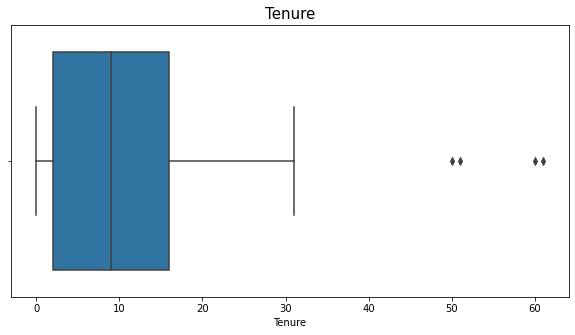

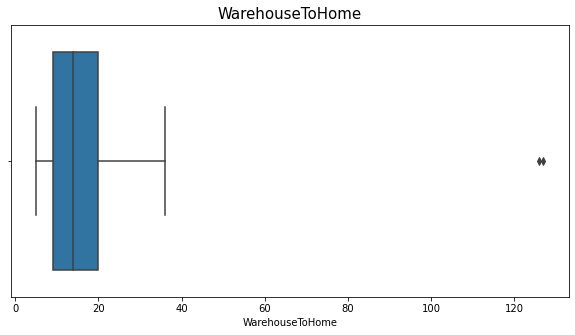

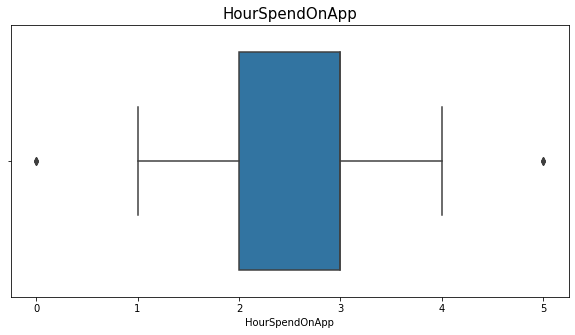

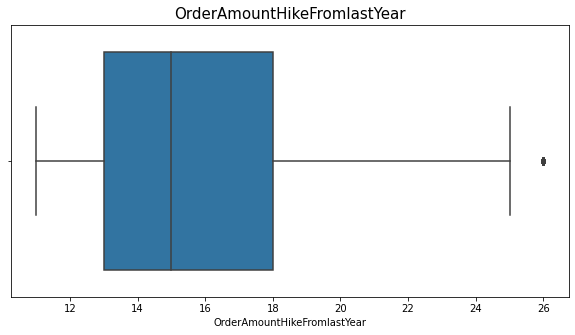

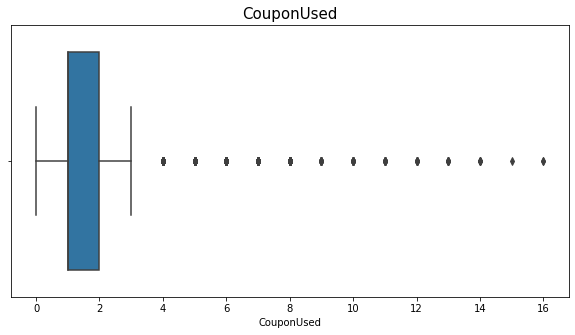

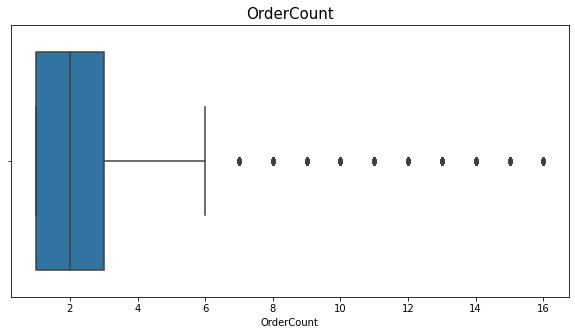

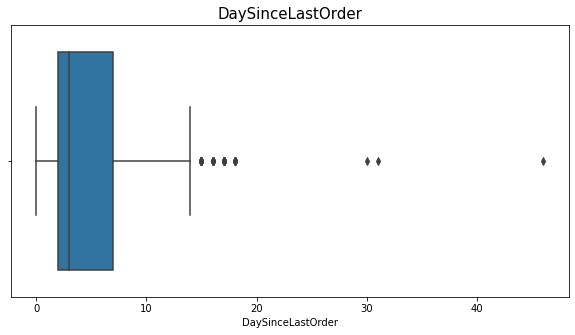

In [18]:
# Creating Box Plot
for column in dfMissing:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[column])
    plt.title(column, size=15)
    plt.show()

Dari grafik diatas kita dapat melihat skewness persebaran data serta outlier dari masing-masing variabel

Selanjutnya, Kita perlu mengecek nilai mean dan median dari masing masing variabel terlebih dahulu

In [19]:
df[['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
count,5366.000000,5379.000000,5375.000000,5365.000000,5374.000000,5372.000000,5323.000000
mean,10.189899,15.639896,2.931535,15.707922,1.751023,3.008004,4.543491
std,8.557241,8.531475,0.721926,3.675485,1.894621,2.939680,3.654433
min,0.000000,5.000000,0.000000,11.000000,0.000000,1.000000,0.000000
25%,2.000000,9.000000,2.000000,13.000000,1.000000,1.000000,2.000000
50%,9.000000,14.000000,3.000000,15.000000,1.000000,2.000000,3.000000
75%,16.000000,20.000000,3.000000,18.000000,2.000000,3.000000,7.000000
max,61.000000,127.000000,5.000000,26.000000,16.000000,16.000000,46.000000


Bisa kita lihat rincian statistik diatas perbedaan nilai mean dan mediannya tidak terlalu jauh.<br>
Karena pada kolom 'CouponUsed' dan 'OrderCount' memiliki banyak outlier, maka untuk kedua kolom tersebut akan kita input menggunakan median sebagai pengisi missing value dan kolom lainnya diisi menggunakan mean

In [20]:
# Mengisi missing value dengan mean
for i in list (['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','DaySinceLastOrder']):
    mean = df[i].mean()
    df[i].fillna(mean, inplace=True)

In [21]:
# Mengisi missing value dengan median
for j in list(['CouponUsed','OrderCount']):
    median = df[j].median()
    df[j].fillna(median, inplace=True)

In [22]:
# Total number of missing values per column
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [23]:
df.shape

(5630, 19)

Oke sekarang sudah bersih dari missing values, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (Outlier)

# Handling Outlier

cek outlier hanya variabel numerik<br>
`["Tenure", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]`

In [24]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df[["Tenure", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]].describe())


Persebaran data sebelum ditangani Outlier: 
            Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
count  5630.000000      5630.000000     5630.000000               5630.000000   
mean     10.189899        15.639896        2.931535                  3.688988   
std       8.354164         8.339095        0.705384                  1.023999   
min       0.000000         5.000000        0.000000                  1.000000   
25%       3.000000         9.000000        2.000000                  3.000000   
50%       9.000000        14.000000        3.000000                  4.000000   
75%      15.000000        20.000000        3.000000                  4.000000   
max      61.000000       127.000000        5.000000                  6.000000   

       SatisfactionScore  NumberOfAddress  OrderAmountHikeFromlastYear  \
count        5630.000000      5630.000000                  5630.000000   
mean            3.066785         4.214032                    15.707922   
std

kalo kita liat persebaran datanya dari kolom max nya ada nilai yang terlalu tinggi bila kita bandingkan dengan min nya.

In [25]:
dfNum = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]

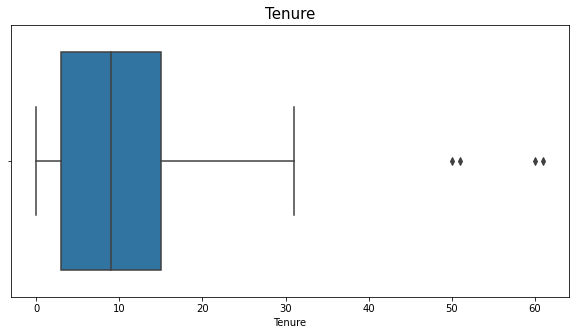

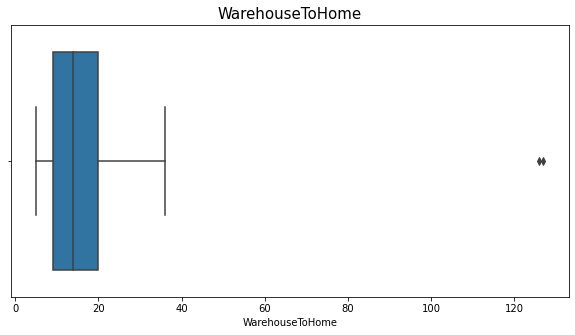

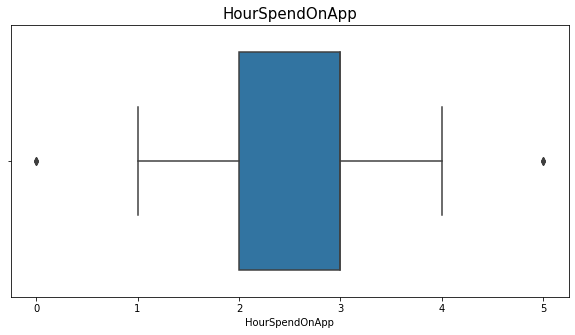

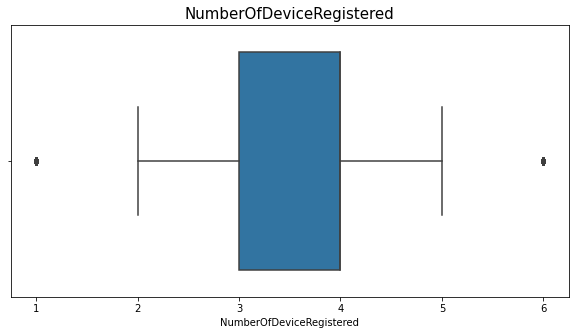

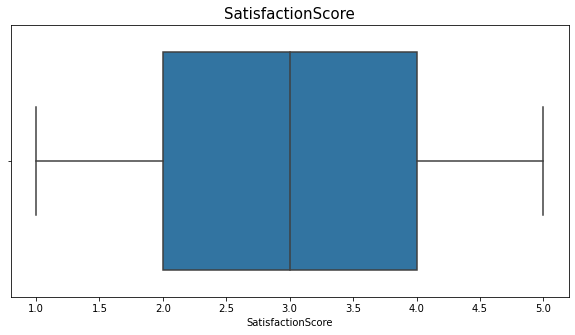

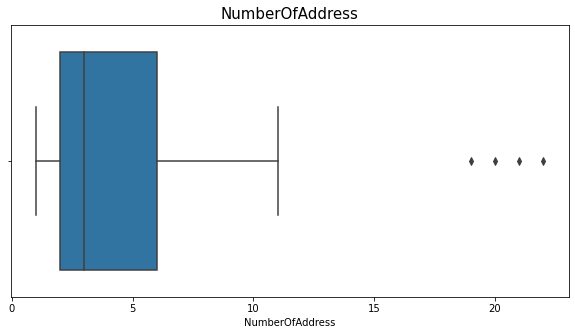

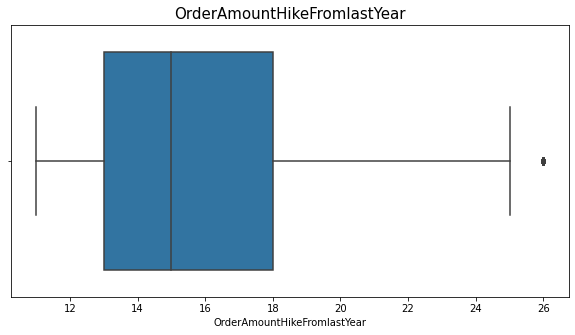

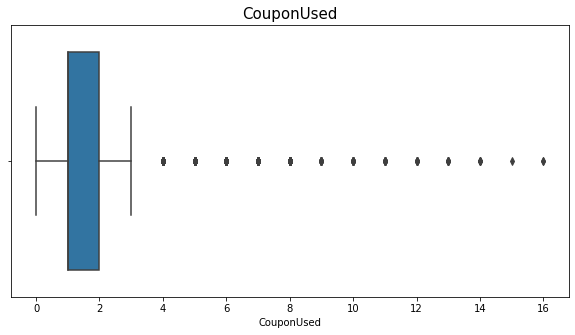

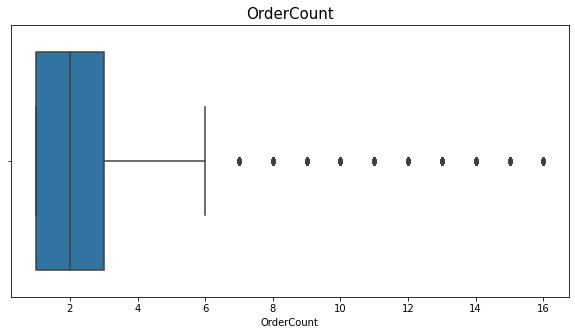

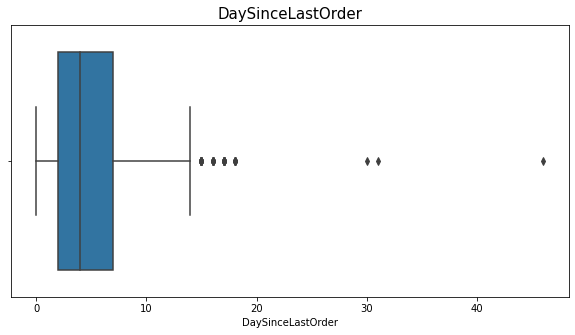

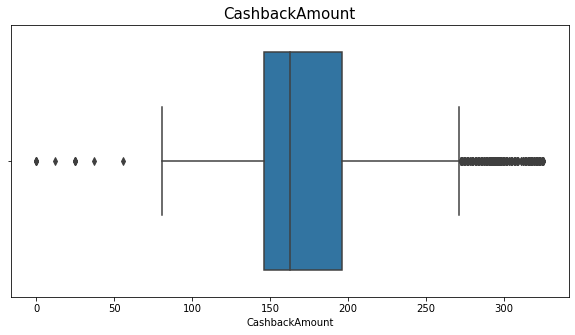

In [26]:
# Creating Box Plot
for column in dfNum:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[column])
    plt.title(column, size=15)
    plt.show()

Dari masing-masing Variable terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik titik yang berada jauh dari gambar boxplotnya.

Dari plot diatas dapat kita simpulkan hanya variabel SatisfactionScore saja yang tidak ada outliernya

Setelah kita mengetahui variable mana saja yang terdapat pencilan (Outlier), selanjutnya kita akan atasi Outlier dengan menggunakan metode interquartile range (IQR).

In [27]:
# Handling with IQR
Q1 = (df[["Tenure", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "NumberOfAddress", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]]).quantile(0.25)
Q3 = (df[["Tenure", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "NumberOfAddress", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]]).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df > maximum)
lower_than = (df < minimum)

df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df[["Tenure", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "NumberOfAddress", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]].describe())

Nilai Maximum dari masing-masing Variable adalah: 
Tenure                          33.0
WarehouseToHome                 36.5
HourSpendOnApp                   4.5
NumberOfDeviceRegistered         5.5
NumberOfAddress                 12.0
OrderAmountHikeFromlastYear     25.5
CouponUsed                       3.5
OrderCount                       6.0
DaySinceLastOrder               14.5
CashbackAmount                 271.0
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
Tenure                        -15.0
WarehouseToHome                -7.5
HourSpendOnApp                  0.5
NumberOfDeviceRegistered        1.5
NumberOfAddress                -4.0
OrderAmountHikeFromlastYear     5.5
CouponUsed                     -0.5
OrderCount                     -2.0
DaySinceLastOrder              -5.5
CashbackAmount                 71.0
dtype: float64


<ipython-input-27-e97878cdccd3>:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df > maximum)
<ipython-input-27-e97878cdccd3>:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df < minimum)



Persebaran data setelah ditangani Outlier: 
            Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
count  5630.000000      5630.000000     5630.000000               5630.000000   
mean     10.173914        15.607924        2.931535                  3.695471   
std       8.287624         8.082533        0.703682                  0.942015   
min       0.000000         5.000000        0.500000                  1.500000   
25%       3.000000         9.000000        2.000000                  3.000000   
50%       9.000000        14.000000        3.000000                  4.000000   
75%      15.000000        20.000000        3.000000                  4.000000   
max      33.000000        36.500000        4.500000                  5.500000   

       NumberOfAddress  OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count      5630.000000                  5630.000000  5630.000000  5630.000000   
mean          4.207993                    15.704991     1.44040

Nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai Maximum & Minimum dari interquartile range (IQR).<br>
Setelah di tangani outliernya, dan dilihat perseberan data nya, terlihat sudah tidak ada lagi nilai yang outlier.

# Checking for Non-Standard Value
cek hanya pada Categorical Feature<br>
`["PreferredLoginDevice", "CityTier", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus", "Complain"]`

Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Perbedaan dari data yang tidak standard akan menjadikan bias nantinya pada saat kita melakukan modeling.

Sebelum kita mengecek data dari masing-masing variable kategori, kita akan mengubah kolom 'CityTier' dan 'Complain' sebagai object

In [28]:
df['CityTier'] = df['CityTier'].astype('object')
df['Complain'] = df['Complain'].astype('object')
df[["PreferredLoginDevice", "CityTier", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus", "Complain"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PreferredLoginDevice  5630 non-null   object
 1   CityTier              5630 non-null   object
 2   PreferredPaymentMode  5630 non-null   object
 3   Gender                5630 non-null   object
 4   PreferedOrderCat      5630 non-null   object
 5   MaritalStatus         5630 non-null   object
 6   Complain              5630 non-null   object
dtypes: object(7)
memory usage: 351.9+ KB


Sekarang kita akan mengecek data dari masing-masing variable untuk mencari data yang tidak standard seperti bermakna ganda atau tidak konsisten

In [29]:
print ("Number of Every Distinct Categorical Feature\n")

for col_name in df.columns:
    if df[col_name].dtypes =='object':
        print ('\nNumber of unique category in {} : {}'.format(col_name, df[col_name].nunique()))
        print ('The values are :')
        print (df[col_name].value_counts())

Number of Every Distinct Categorical Feature


Number of unique category in PreferredLoginDevice : 3
The values are :
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Number of unique category in CityTier : 3
The values are :
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Number of unique category in PreferredPaymentMode : 7
The values are :
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Number of unique category in Gender : 2
The values are :
Male      3384
Female    2246
Name: Gender, dtype: int64

Number of unique category in PreferedOrderCat : 6
The values are :
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dt

Setelah kita mengeteahui variable mana saja yang ada nilai tidak standar, maka kita standarkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya.

Berdasarkan hasil diatas, terlihat bahwa ada beberapa variable yang tidak konsisten atau bermakna ganda seperti:
1. PreferredLoginDevice --> (Mobile Phone, Computer, Phone) dapat disesuaikan menjadi `(Mobile Phone, Computer)`
2. PreferredPaymentMode --> (Debit Card, Credit Card, E Wallet, UPI, COD, CC, Cash on Delivery) dapat disesuaikan menjadi `(Debit Card, Credit Card, E Wallet, UPI, COD)`
3. PreferredOrderCat --> (Laptop & Accessory, Mobile Phone, Fashion, Mobile, Grocery, Others) dapat disesuaikan menjadi `(Laptop & Accessory, Mobile Phone, Fashion, Grocery, Others)`

Sekarang kita akan standarkan nilainya yang bermakna sama dengan replace

In [30]:
df['PreferredLoginDevice'].replace('Phone','Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True)
df['PreferredPaymentMode'].replace('Cash on Delivery','COD', inplace=True)
df['PreferedOrderCat'].replace('Mobile','Mobile Phone', inplace=True)

In [31]:
print ("Number of Every Distinct Categorical Feature After Standardization\n")

for col_name in df.columns:
    if df[col_name].dtypes =='object':
        print ('\nNumber of unique category in {} : {}'.format(col_name, df[col_name].nunique()))
        print ('The values are :')
        print (df[col_name].value_counts())

Number of Every Distinct Categorical Feature After Standardization


Number of unique category in PreferredLoginDevice : 2
The values are :
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

Number of unique category in CityTier : 3
The values are :
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Number of unique category in PreferredPaymentMode : 5
The values are :
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64

Number of unique category in Gender : 2
The values are :
Male      3384
Female    2246
Name: Gender, dtype: int64

Number of unique category in PreferedOrderCat : 5
The values are :
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Number of unique category in MaritalStatus : 3
The values are :
Married     2986
Single  

Cek hasil
1. PreferredLoginDevice --> `(Mobile Phone, Computer)`
2. PreferredPaymentMode --> `(Debit Card, Credit Card, E Wallet, COD, UPI)`
3. PreferredOrderCat --> `(Mobile Phone, Laptop & Accessory, Fashion, Grocery, Others)`

Berikut adalah data yang sudah clean

In [32]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3.0,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
50002,1,10.189899,Mobile Phone,1,8.0,UPI,Male,3.000000,4.0,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,121
50003,1,10.189899,Mobile Phone,1,30.0,Debit Card,Male,2.000000,4.0,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120
50004,1,0.000000,Mobile Phone,3,15.0,Debit Card,Male,2.000000,4.0,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
50005,1,0.000000,Mobile Phone,1,12.0,Credit Card,Male,2.931535,3.0,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [33]:
df.shape

(5630, 19)

In [34]:
df[["Tenure", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       5630 non-null   float64
 1   WarehouseToHome              5630 non-null   float64
 2   HourSpendOnApp               5630 non-null   float64
 3   NumberOfDeviceRegistered     5630 non-null   float64
 4   SatisfactionScore            5630 non-null   int64  
 5   NumberOfAddress              5630 non-null   int64  
 6   OrderAmountHikeFromlastYear  5630 non-null   float64
 7   CouponUsed                   5630 non-null   float64
 8   OrderCount                   5630 non-null   float64
 9   DaySinceLastOrder            5630 non-null   float64
 10  CashbackAmount               5630 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 527.8 KB


Terlihat fitur numerik banyak berubah menjadi type float, mari kita rubah dahulu ke type int

In [35]:
df["Tenure"] = df["Tenure"].apply(np.int64)
df["WarehouseToHome"] = df["WarehouseToHome"].apply(np.int64)
df["HourSpendOnApp"] = df["HourSpendOnApp"].apply(np.int64)
df["NumberOfDeviceRegistered"] = df["NumberOfDeviceRegistered"].apply(np.int64)
df["OrderAmountHikeFromlastYear"] = df["OrderAmountHikeFromlastYear"].apply(np.int64)
df["CouponUsed"] = df["CouponUsed"].apply(np.int64)
df["OrderCount"] = df["OrderCount"].apply(np.int64)
df["DaySinceLastOrder"] = df["DaySinceLastOrder"].apply(np.int64)

In [36]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
50002,1,10,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,121
50003,1,10,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
50005,1,0,Mobile Phone,1,12,Credit Card,Male,2,3,Mobile Phone,5,Single,3,0,11,1,1,3,130


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Churn                        5630 non-null   int64 
 1   Tenure                       5630 non-null   int64 
 2   PreferredLoginDevice         5630 non-null   object
 3   CityTier                     5630 non-null   object
 4   WarehouseToHome              5630 non-null   int64 
 5   PreferredPaymentMode         5630 non-null   object
 6   Gender                       5630 non-null   object
 7   HourSpendOnApp               5630 non-null   int64 
 8   NumberOfDeviceRegistered     5630 non-null   int64 
 9   PreferedOrderCat             5630 non-null   object
 10  SatisfactionScore            5630 non-null   int64 
 11  MaritalStatus                5630 non-null   object
 12  NumberOfAddress              5630 non-null   int64 
 13  Complain                    

# Export DataFrame to CSVclean

In [38]:
df.to_csv('data/ECommerceDataset_clean.csv')